In [28]:
#Imported applicable panda libraries
import pandas as pd
from pathlib import Path
import hvplot.pandas
import numpy as np
import requests
import requests_html
import ftplib
import io
from yahoo_fin.stock_info import get_data
import yahoo_fin.stock_info as si
from IPython.display import display_html
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [29]:
#Created a for loop to get historical data for listed price in ticker_list utilzing get_data function from yahoo_fin.stock_info API
s1= "dte"
s2= "vst"
s3 = "ugi"
s4 = "fe"
s5= "cnp"

ticker_list = [s1,s2,s3,s4,s5]
historical_data = {}
for ticker in ticker_list:
    historical_data[ticker] = get_data(ticker)


In [30]:
#created variables to parse historical close prices for individuals stocks
ticker_1 = historical_data[s1]["close"]
ticker_2 = historical_data[s2]["close"]
ticker_3 = historical_data[s3]["close"]
ticker_4 = historical_data[s4]["close"]
ticker_5 = historical_data[s5]["close"]


In [31]:
#created finance_stocks_close_df that concatenated the individual stocks closing prices into one data frame
finance_stocks_close_df = pd.concat([ticker_1,ticker_2,ticker_3,ticker_4,ticker_5],axis=1,keys=[s1,s2,s3,s4,s5])
display(finance_stocks_close_df.head())
display(finance_stocks_close_df.tail())

,dte,vst,ugi,fe,cnp
1970-03-25,19.468084,NaN,NaN,NaN,12.364000
1970-03-26,19.468084,NaN,NaN,NaN,12.399125
1970-03-30,18.936171,NaN,NaN,NaN,12.434250
1970-03-31,18.936171,NaN,NaN,NaN,12.504500
1970-04-01,18.829786,NaN,NaN,NaN,12.539625


,dte,vst,ugi,fe,cnp
2022-04-29,131.039993,25.020000,34.299999,43.310001,30.610001
2022-05-02,128.740005,24.690001,34.709999,42.939999,30.219999
2022-05-03,129.610001,25.250000,35.500000,43.139999,30.540001
2022-05-04,130.759995,25.920000,37.099998,43.650002,31.340000
2022-05-05,128.830002,25.410000,37.099998,42.480000,30.940001


In [32]:
#Code used to confirm start dates of the finance_stocks_close_df above
historical_data[s5].head(2)

,open,high,low,close,adjclose,volume,ticker
1970-03-25,12.15325,12.43425,12.15325,12.364000,0.472963,60498,CNP
1970-03-26,12.36400,12.43425,12.36400,12.399125,0.474307,100000,CNP


In [33]:
#describe() function used to get the statistial summary for the the listed stock tickers
finance_stocks_close_df.describe()

,dte,vst,ugi,fe,cnp
count,13147.000000,1406.000000,12412.000000,6162.000000,13147.000000
mean,35.010822,20.373286,13.152929,39.386350,15.839073
std,27.592697,3.401026,14.715377,11.093101,6.805653
min,6.382979,12.600000,1.041667,18.187500,4.500000
25%,14.148936,17.790001,2.916667,31.750000,10.110000
50%,27.200001,19.655000,5.138889,37.075001,14.489063
75%,39.459574,23.045000,18.180000,43.730000,20.010000
max,139.119995,27.370001,58.959999,83.209999,42.166859


In [34]:
#daily_returns_finance_stocks variable created to computes daily returns for each individual ticker 
daily_returns_finance_stocks = finance_stocks_close_df.pct_change().dropna()
daily_returns_finance_stocks.head()

,dte,vst,ugi,fe,cnp
2016-10-06,0.004356,0.016129,0.007536,0.002549,-0.002237
2016-10-07,-0.004446,0.009524,-0.009973,-0.004766,-0.017937
2016-10-10,0.005882,0.006289,0.009615,0.013091,0.012785
2016-10-11,-0.008121,0.021875,-0.025850,-0.016073,-0.015329
2016-10-12,0.001638,0.000000,0.012570,0.004484,0.010989


In [35]:
#finance_cum_ret variable created that computes the cumulative returns for each individual ticker and used to plot returns for comparison.
finance_cum_ret = (1 + daily_returns_finance_stocks).cumprod() -1
display(finance_cum_ret.hvplot(legend=True,figsize=(10,7),title="Cumulative Returns",xlabel="Year",ylabel="Returns"))

:NdOverlay   [Variable]
   :Curve   [index]   (value)

:Bars   [index]   (0)

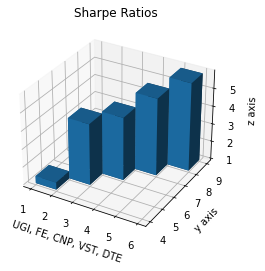

None

In [37]:
# variables created for annualized standard deviation and annualized returns for the individual tickers utilizing 252 trading days to compute and plot the Sharpe Ratios (Return/Risk ratio)
trading_year = 252
annualized_std = daily_returns_finance_stocks.std() * np.sqrt(trading_year)
annualized_returns = daily_returns_finance_stocks.mean() * trading_year
sharpe = annualized_returns/annualized_std
#created a 3d plot to display the Sharpe Ratio is ascending order for tickers
fig = plt.figure()
ax1 =fig.add_subplot(111,projection="3d")
x3 = [1,2,3,4,5]
y3 = [4,5,6,7,8]
z3 = np.ones(5)

dx = np.ones(5)
dy = np.ones(5)
dz = [.4,3.4,3.5,4.3,4.9]

ax1.bar3d(x3,y3,z3,dx,dy,dz)

ax1.set_xlabel("UGI, FE, CNP, VST, DTE")
ax1.set_ylabel("y axis")
ax1.set_zlabel("z axis")
ax1.set_title("Sharpe Ratios")



display(sharpe.hvplot(kind="bar",figsize=(10,7),title="Sharpe Ratios")) 
display(plt.show())

In [38]:
#Analyst to recommend 2 tickers to provide to user from selected industry sector based on Sharpe Ratio and cumulative returns comparison above.
#Utilizing the get_stats_valuation function from the yahoo_fin.stock_info library to get selected tickers current valuation stats. This section is used to compare selected tickers
#trailing P/E and Forward P/E ratios for ticker recommendation (Fundamental Analysis).
stock_1 = s1
stock_2 = s2

stock_selection1 = si.get_stats_valuation(stock_1).style.set_table_attributes("style='display:inline'").set_caption(stock_1)
stock_selection2 = si.get_stats_valuation(stock_2).style.set_table_attributes("style='display:inline'").set_caption(stock_2)

display_html(stock_selection1._repr_html_()+stock_selection2._repr_html_(), raw=True)

dte 
 
 
   
 Unnamed: 0 
 As of Date: 5/1/2022Current 
 3/31/2022 
 12/31/2021 
 9/30/2021 
 6/30/2021 
 3/31/2021 
 
 
 
 
 0 
 Market Cap (intraday) 
 25.39B 
 25.61B 
 23.16B 
 21.64B 
 25.11B 
 25.79B 
 
 
 1 
 Enterprise Value 
 43.61B 
 43.84B 
 40.81B 
 41.33B 
 44.19B 
 44.93B 
 
 
 2 
 Trailing P/E 
 31.96 
 32.25 
 22.73 
 16.31 
 17.58 
 18.81 
 
 
 3 
 Forward P/E 
 21.98 
 22.12 
 20.08 
 18.66 
 18.42 
 18.48 
 
 
 4 
 PEG Ratio (5 yr expected) 
 3.53 
 3.55 
 nan 
 nan 
 nan 
 nan 
 
 
 5 
 Price/Sales (ttm) 
 1.70 
 1.71 
 1.64 
 1.60 
 1.94 
 2.11 
 
 
 6 
 Price/Book (mrq) 
 2.92 
 2.94 
 2.70 
 1.75 
 2.00 
 2.08 
 
 
 7 
 Enterprise Value/Revenue 
 2.73 
 9.58 
 8.78 
 11.13 
 13.69 
 11.89 
 
 
 8 
 Enterprise Value/EBITDA 
 15.39 
 47.55 
 50.13 
 94.79 
 57.32 
 46.13 
 
 
 

 
 vst 
 
 
   
 Unnamed: 0 
 As of Date: 4/30/2022Current 
 12/31/2021 
 9/30/2021 
 6/30/2021 
 3/31/2021 
 
 
 
 
 0 
 Market Cap (intraday) 
 11.03B 
 10.68B 
 8.25B 
 8.95B 
 8.51B 
 
 
 1 
 Enterprise Value 
 22.72B 
 21.95B 
 19.73B 
 20.47B 
 17.99B 
 
 
 2 
 Trailing P/E 
 nan 
 nan 
 nan 
 nan 
 13.60 
 
 
 3 
 Forward P/E 
 15.38 
 14.64 
 9.88 
 nan 
 nan 
 
 
 4 
 PEG Ratio (5 yr expected) 
 0.83 
 0.71 
 0.49 
 nan 
 nan 
 
 
 5 
 Price/Sales (ttm) 
 1.00 
 0.98 
 0.70 
 0.77 
 0.76 
 
 
 6 
 Price/Book (mrq) 
 1.75 
 1.77 
 1.36 
 1.47 
 1.02 
 
 
 7 
 Enterprise Value/Revenue 
 1.88 
 6.62 
 6.60 
 7.98 
 5.61 
 
 
 8 
 Enterprise Value/EBITDA 
 29.05 
 15.01 
 26.56 
 41.61 
 -9.42

In [39]:
#Listing 52 week high/low of ticker to current ticker price (technical analysis) for determining breakouts opportunites for ticker and support and resistance areas for purchase or sells.
input= stock_1
ticker_52_wk_high_low = si.get_stats(input)[3:5]
display(input)
display(ticker_52_wk_high_low)
print(f"Most recent price for: {si.get_live_price(input): .02f}")

'dte'

,Attribute,Value
3,52 Week High 3,140.23
4,52 Week Low 3,108.22


Most recent price for:  128.97


In [40]:
#Utilizing the get_stats function from the yahoo_fin.stock_info library to get selected tickers current financial stats. This section is used to compare selected tickers
# financial stats (Fundamental Analysis).


stock_selection1 = si.get_stats(stock_1).style.set_table_attributes("style='display:inline'").set_caption(stock_1)
stock_selection2 = si.get_stats(stock_2).style.set_table_attributes("style='display:inline'").set_caption(stock_2)

display_html(stock_selection1._repr_html_()+stock_selection2._repr_html_(), raw=True)

,Attribute,Value
0,Beta (5Y Monthly),0.66
1,52-Week Change 3,6.84%
2,S&P500 52-Week Change 3,-2.03%
3,52 Week High 3,140.23
4,52 Week Low 3,108.22
5,50-Day Moving Average 3,130.57
6,200-Day Moving Average 3,120.13
7,Avg Vol (3 month) 3,1.15M
8,Avg Vol (10 day) 3,1.09M
9,Shares Outstanding 5,193.74M
